### 7 Class to 3

In [ ]:

from avcv.all import *

In [ ]:
in_path = '/data/DMS_Behavior_Detection/annotations/val_7class.json'
out_path = osp.join(osp.dirname(in_path), 'val_3class_phone_face_food.json')
cc = CocoDataset(in_path)
print(in_path)
print(out_path)


/data/DMS_Behavior_Detection/annotations/val_7class.json
/data/DMS_Behavior_Detection/annotations/val_3class_phone_face_food.json


In [ ]:
old_cat_name2id = {cat['name']:cat['id'] for cat in cc.gt.cats.values()}
old_cat_id2name = {cat['id']:cat['name'] for cat in cc.gt.cats.values()}

In [ ]:
new_cats = ['phone', 'cigarette', 'food/drink']
new_cat_name2id = {name:i+1 for i, name in enumerate(new_cats)}

In [ ]:
data = dict(images=[], annotations=[], categories=[dict(name=name, id=id) for name, id in new_cat_name2id.items()])

In [ ]:
old_dataset = cc.gt.dataset.copy()
for image_id in tqdm(cc.img_ids):
    data['images'].append(cc.gt.imgs[image_id])
    for ann in cc.gt.imgToAnns[image_id]:
        cat_name = old_cat_id2name[ann['category_id']]
        if cat_name in new_cats:
            ann['category_id'] = new_cat_name2id[cat_name]
            data['annotations'].append(ann)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5091/5091 [00:00<00:00, 265821.83it/s]


In [ ]:
mmcv.dump(data, out_path)

In [ ]:
cc = CocoDataset(out_path)

2022-09-29 04:15:08.422 | INFO     | avcv.coco:visualize:190 - Random visualize img_id=4214


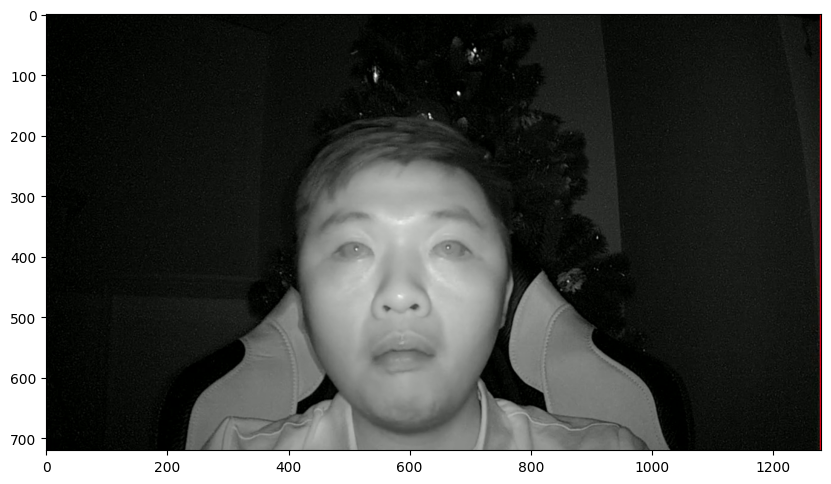

In [ ]:
cc.visualize(show=1);